In [1]:
from decomposer import Decomposer, DecomposerConfig
from recomposer import Recomposer, RecomposerConfig
from evaluations.clustering import *  # I’m so sorry

/home/webson/Research/congressional_adversary/congressional_env/lib/python3.7/site-packages/torch/serialization.py:593: SourceChangeWarning: source code of class 'decomposer.Decomposer' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [2]:
base_dir = '../../results/recomposer'
# base_dir = '../../results/recomposer/handpicked'
deno_space, cono_space = load_recomposers_en_masse(base_dir, endswith='epoch10.pt')

['Dd0.2', 'Dg-4.5', 'Cd-7.4', 'Cg6.6', 'R22.5', 'dp0.31', 'epoch10.pt']
['Dd2.3', 'Dg-10.7', 'Cd-8.0', 'Cg5.1', 'R33.7', 'dp0.03', 'epoch10.pt']
['Dd4.2', 'Dg-39.4', 'Cd-8.2', 'Cg1.8', 'R22.2', 'dp0.31', 'epoch10.pt']
['Dd0.3', 'Dg-6.7', 'Cd-4.0', 'Cg7.1', 'R10.8', 'dp0.58', 'epoch10.pt']
['Dd2.2', 'Dg-35.4', 'Cd-3.9', 'Cg1.4', 'R21.7', 'dp0.22', 'epoch10.pt']
['Dd3.0', 'Dg-41.5', 'Cd-9.3', 'Cg9.5', 'R48.6', 'dp0.49', 'epoch10.pt']
['Dd1.5', 'Dg-45.1', 'Cd-3.2', 'Cg4.4', 'R14.9', 'dp0.30', 'epoch10.pt']
['Dd1.9', 'Dg-2.5', 'Cd-2.7', 'Cg6.0', 'R16.2', 'dp0.09', 'epoch10.pt']


In [ ]:
base_dir = '../../results/recomposer/superset pretrained'
D_super, C_super = load_recomposers_en_masse(base_dir, endswith='epoch10.pt')

 60%|██████    | 6/10 [00:17<00:11,  2.82s/it]

SystemError: <built-in method write of _io.BufferedWriter object at 0x7fec97485dd0> returned a result with an error set

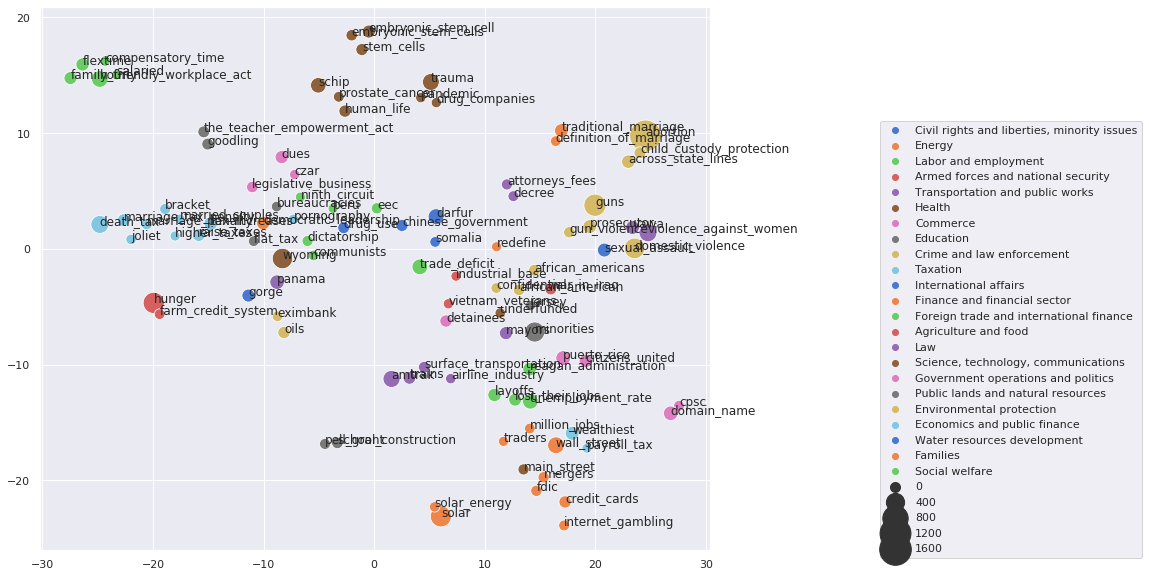

In [3]:
models = deno_space

# graph_en_masse(
#     models,
#     out_dir=f'{base_dir}/Joint/topic/PCA',
#     reduction='PCA', 
#     word_ids=J_ids, words=J_words, hues=J_deno, sizes=J_freq,
#     categorical=True
# )

graph_en_masse(
    models, out_dir=f'{base_dir}/decomposed deno/topic/t-SNE p5',
    reduction='TSNE', perplexity=5,
    word_ids=J_ids, words=J_words, hues=J_deno, sizes=J_freq,
    categorical=True)

graph_en_masse(
    models,
    out_dir=f'{base_dir}/decomposed deno/topic/t-SNE p3',
    reduction='TSNE', perplexity=3,
    word_ids=J_ids, words=J_words, hues=J_deno, sizes=J_freq,
    categorical=True)

graph_en_masse(
    models,
    out_dir=f'{base_dir}/decomposed deno/topic/t-SNE p10',
    reduction='TSNE', perplexity=10,
    word_ids=J_ids, words=J_words, hues=J_deno, sizes=J_freq,
    categorical=True)

In [ ]:
models = deno_space

graph_en_masse(
    models,
    out_dir=f'{base_dir}/decomposed deno/party/t-SNE p25',
    reduction='TSNE', perplexity=25,
    word_ids=J_ids, words=J_words, hues=J_skew, sizes=J_freq)

graph_en_masse(
    models,
    out_dir=f'{base_dir}/decomposed deno/party/t-SNE p50',
    reduction='TSNE', perplexity=50,
    word_ids=J_ids, words=J_words, hues=J_skew, sizes=J_freq)

In [ ]:
models = cono_space

graph_en_masse(
    models, out_dir=f'{base_dir}/decomposed cono/topic/t-SNE p5',
    reduction='TSNE', perplexity=5,
    word_ids=J_ids, words=J_words, hues=J_deno, sizes=J_freq,
    categorical=True)

graph_en_masse(
    models,
    out_dir=f'{base_dir}/decomposed cono/topic/t-SNE p3',
    reduction='TSNE', perplexity=3,
    word_ids=J_ids, words=J_words, hues=J_deno, sizes=J_freq,
    categorical=True)

graph_en_masse(
    models,
    out_dir=f'{base_dir}/decomposed cono/topic/t-SNE p10',
    reduction='TSNE', perplexity=10,
    word_ids=J_ids, words=J_words, hues=J_deno, sizes=J_freq,
    categorical=True)

In [ ]:
models = cono_space

# graph_en_masse(
#     models,
#     out_dir=f'{base_dir}/Joint/topic/PCA',
#     reduction='PCA',
#     word_ids=J_ids, words=J_words, hues=J_skew, sizes=J_freq)

graph_en_masse(
    models,
    out_dir=f'{base_dir}/decomposed cono/party/t-SNE p25',
    reduction='TSNE', perplexity=25,
    word_ids=J_ids, words=J_words, hues=J_skew, sizes=J_freq)

graph_en_masse(
    models,
    out_dir=f'{base_dir}/decomposed cono/party/t-SNE p50',
    reduction='TSNE', perplexity=50,
    word_ids=J_ids, words=J_words, hues=J_skew, sizes=J_freq)

# Homogeneity V-Measure

In [ ]:
# Deno space, eval deno, higher is better
for model_name, model in deno_space.items():
    cluster_labels, true_labels = NN_cluster_ids(
        model, J_ids, categorical=True, top_k=10)    
    homogeneity, completeness, v_measure = np.around(
        homogeneity_completeness_v_measure(true_labels, cluster_labels), 4)
    print(model_name, homogeneity, completeness, v_measure, sep='\t')
#     print(pred_labels)

In [ ]:
# Deno space, eval cono, lower is better
for model_name, model in deno_space.items():
    cluster_labels, true_labels = NN_cluster_ids(
        model, J_ids, categorical=False, top_k=5)    
    homogeneity, completeness, v_measure = np.around(
        homogeneity_completeness_v_measure(true_labels, cluster_labels), 4)
    print(model_name, homogeneity, completeness, v_measure, sep='\t')
#     print(pred_labels)

In [ ]:
# Cono space, eval cono, higher is better
for model_name, model in cono_space.items():
    cluster_labels, true_labels = NN_cluster_ids(
        model, J_ids, categorical=False, top_k=5)    
    homogeneity, completeness, v_measure = np.around(
        homogeneity_completeness_v_measure(true_labels, cluster_labels), 4)
    print(model_name, homogeneity, completeness, v_measure, sep='\t')

In [ ]:
# Cono space, eval deno, lower is better
for model_name, model in cono_space.items():
    cluster_labels, true_labels = NN_cluster_ids(
        model, J_ids, categorical=True, top_k=5)    
    homogeneity, completeness, v_measure = np.around(
        homogeneity_completeness_v_measure(true_labels, cluster_labels), 4)
    print(model_name, homogeneity, completeness, v_measure, sep='\t')